In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys, os
from scipy.interpolate import griddata
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.ticker as mtick

In [122]:
datalocation = 'natural_10um'
foldername = '../'+ datalocation + '/Plane Output'

# ------------------------------------
# ROOM DIMENSIONS: 
# XMIN = 0, XMAX = 4 (LENGTH)
# YMIN = 0, YMAX = 3 (HEIGHT)
# ZMIN = 0, ZMAX = 3 (WIDTH)

# SUSCEPTIBLE PERSON NOSTRILS:
# XMIN = 2.585, XMAX = 2.615
# YMIN = 1.25, YMAX = 1.27
# ZMIN = 2.28, ZMAX = 2.3
# ------------------------------------

xmin = 0
xmax = 4

ymin = 0 #1.2
ymax = 3 #1.25

zmin = 0
zmax = 3


In [123]:
times = np.arange(15,1200,step=15)
dpms = []
nvir = []

times2 = []
dpms2 = []


for i,v in enumerate(times):
    filename = foldername + '/planeoutput-' + str(float(v))

    val1=0
    val2=0
    with open(filename,'r') as file:
        count = 0
        for lines in file:
            count+=1
            if count>1:
                values = lines.split()
                if float(values[2])>=ymin and float(values[2])<=ymax:
                        val1+=float(values[8])*float(values[10])
                
                if float(values[1])>=2.585 and float(values[1])<=2.615:
                    if float(values[2])>=1.24 and float(values[2])<=1.26:
                        if float(values[3])>=2.28 and float(values[3])<=2.3:
                            val2+=float(values[9])*16
            
    dpms.append(val1)
    nvir.append(val2)

    if (not v%60) and (v<=1800):
        times2.append(v)
        dpms2.append(val1)

dpms = np.array(dpms)
nvir = np.array(nvir)

times2 = np.array(times2)
dpms2 = np.array(dpms2)


filename1 = '../'+ datalocation + '/dpms.csv'
filename2 = '../'+ datalocation + '/dpms2.csv'
filetimes1 = '../'+ datalocation + '/times.csv'
filetimes2 = '../'+ datalocation + '/times2.csv'


# filename1 = '../'+ datalocation + '/delay_dpms.csv'
# filename2 = '../'+ datalocation + '/delay_dpms2.csv'
# filetimes1 = '../'+ datalocation + '/delay_times.csv'
# filetimes2 = '../'+ datalocation + '/delay_times2.csv'


np.savetxt(filename1,dpms)
np.savetxt(filename2,dpms2)
np.savetxt(filetimes1,times)
np.savetxt(filetimes2,times2)


In [93]:
d = nvir/16000

k = 410

power = -1/k * d
P = 1 - np.exp(power)

In [94]:
nvir_normal = np.zeros(int(len(nvir)/4)-2)
timeshalf = np.zeros(int(len(times)/4)-2)
timeshalf[0] = 60
for i in range(1,int(len(nvir)/4)-2):
    timeshalf[i] = times[i*4+1]
    nvir_normal[i] = nvir[i*4+3]-nvir[i*4-1]


In [ ]:
stable, = np.where(timeshalf==int(13.5*60))
end, = np.where(timeshalf==float(1800-30))
# print(timeshalf,stable[0],end[0])

times_stable = timeshalf[stable[0]:end[0]]
nvir_stable = nvir_normal[stable[0]:end[0]]

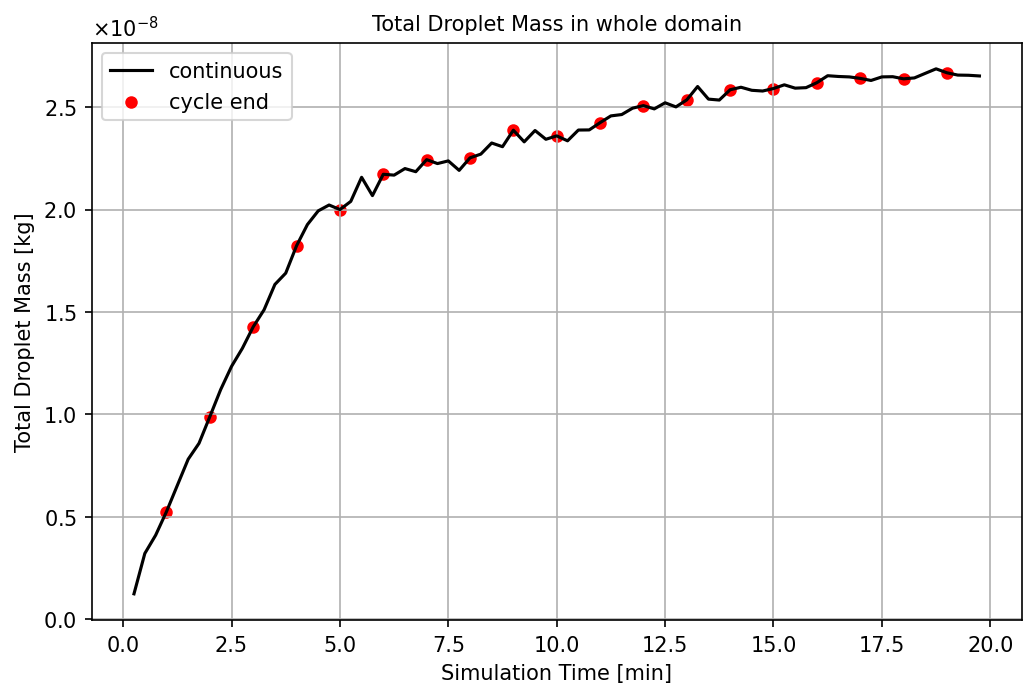

In [124]:
fig,axs = plt.subplots(nrows=1, ncols=1, num=1, figsize=(8,5),dpi=150)
axs.ticklabel_format(style='sci',axis='y', useMathText=True)
axs.plot(times/60,dpms,'k-',label='continuous')
axs.scatter(times2/60, dpms2, c='r', s=25, label = 'cycle end')
axs.legend()
axs.set_xlabel('Simulation Time [min]')
axs.set_ylabel('Total Droplet Mass [kg]')
axs.set_title('Total Droplet Mass in whole domain', fontsize=10)
# plt.minorticks_on()
plt.grid(which='major')
# plt.grid(which='minor',linestyle=':')

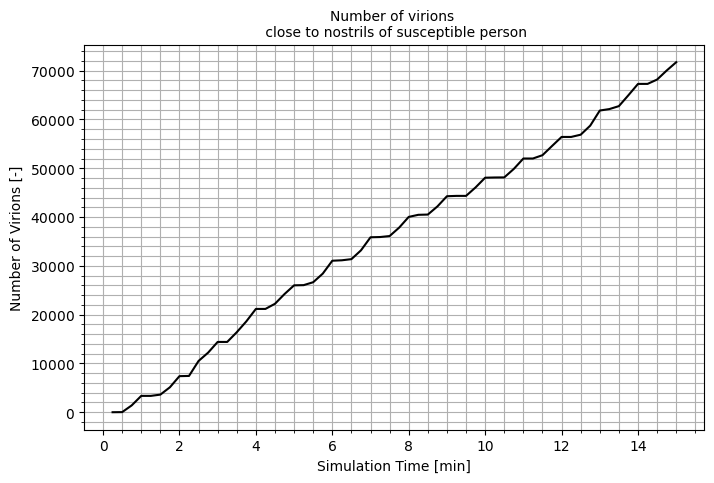

In [29]:
fig,axs = plt.subplots(nrows=1, ncols=1, num=1, figsize=(8,5),dpi=100)
axs.ticklabel_format(style='sci',axis='y', useMathText=True)
axs.plot(times/60,nvir,'k')
# axs.plot(timeshalf/60,nvir_normal,'k')
# axs.scatter(timeshalf/60,nvir_normal,marker='o')
# axs.scatter(times_stable/60,nvir_stable,marker='o',c='r')
axs.set_xlabel('Simulation Time [min]')
axs.set_ylabel('Number of Virions [-]')
axs.set_title('Number of virions \n close to nostrils of susceptible person', fontsize=10)
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor',linestyle='-')

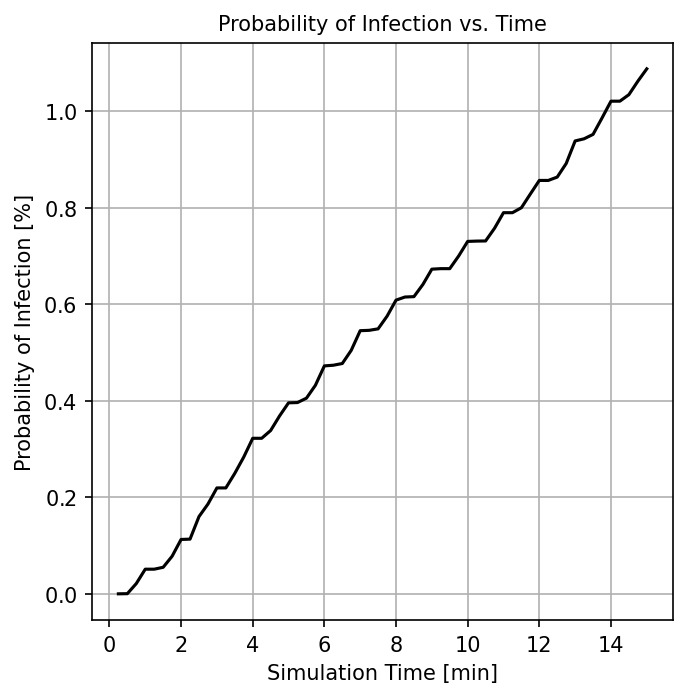

In [30]:
fig,ax = plt.subplots(num=1, figsize=(5,5),dpi=150)
p = ax.plot(times/60,P*100,'k',label='all')
plt.ticklabel_format(style='sci',axis='y', useMathText=True)
plt.xlabel('Simulation Time [min]')
plt.ylabel('Probability of Infection [%]')
plt.title('Probability of Infection vs. Time', fontsize=10)
plt.grid(which='major')

In [127]:
d_cr30 = np.array(pd.read_csv('../closedRoom_30um/dpms.csv'))[:,0]
t_cr30 = np.array(pd.read_csv('../closedRoom_30um/times.csv'))[:,0]
d_cr30 = np.insert(d_cr30,0,0)
t_cr30 = np.insert(t_cr30,0,0)

d_cr50 = np.array(pd.read_csv('../closedRoom_50um/dpms.csv'))[:,0]
t_cr50 = np.array(pd.read_csv('../closedRoom_50um/times.csv'))[:,0]
d_cr50 = np.insert(d_cr50,0,0)
t_cr50 = np.insert(t_cr50,0,0)

d_nv10 = np.array(pd.read_csv('../natural_10um/dpms.csv'))[:,0]
t_nv10 = np.array(pd.read_csv('../natural_10um/times.csv'))[:,0]
d_nv10 = np.insert(d_nv10,0,0)
t_nv10 = np.insert(t_nv10,0,0)

d_nv30 = np.array(pd.read_csv('../natural_30um/dpms.csv'))[:,0]
t_nv30 = np.array(pd.read_csv('../natural_30um/times.csv'))[:,0]
d_nv30 = np.insert(d_nv30,0,0)
t_nv30 = np.insert(t_nv30,0,0)

d_nv50 = np.array(pd.read_csv('../natural_50um/dpms.csv'))[:,0]
t_nv50 = np.array(pd.read_csv('../natural_50um/times.csv'))[:,0]
d_nv50 = np.insert(d_nv50,0,0)
t_nv50 = np.insert(t_nv50,0,0)


Text(0, 0.5, 'Total Droplet Mass [kg]')

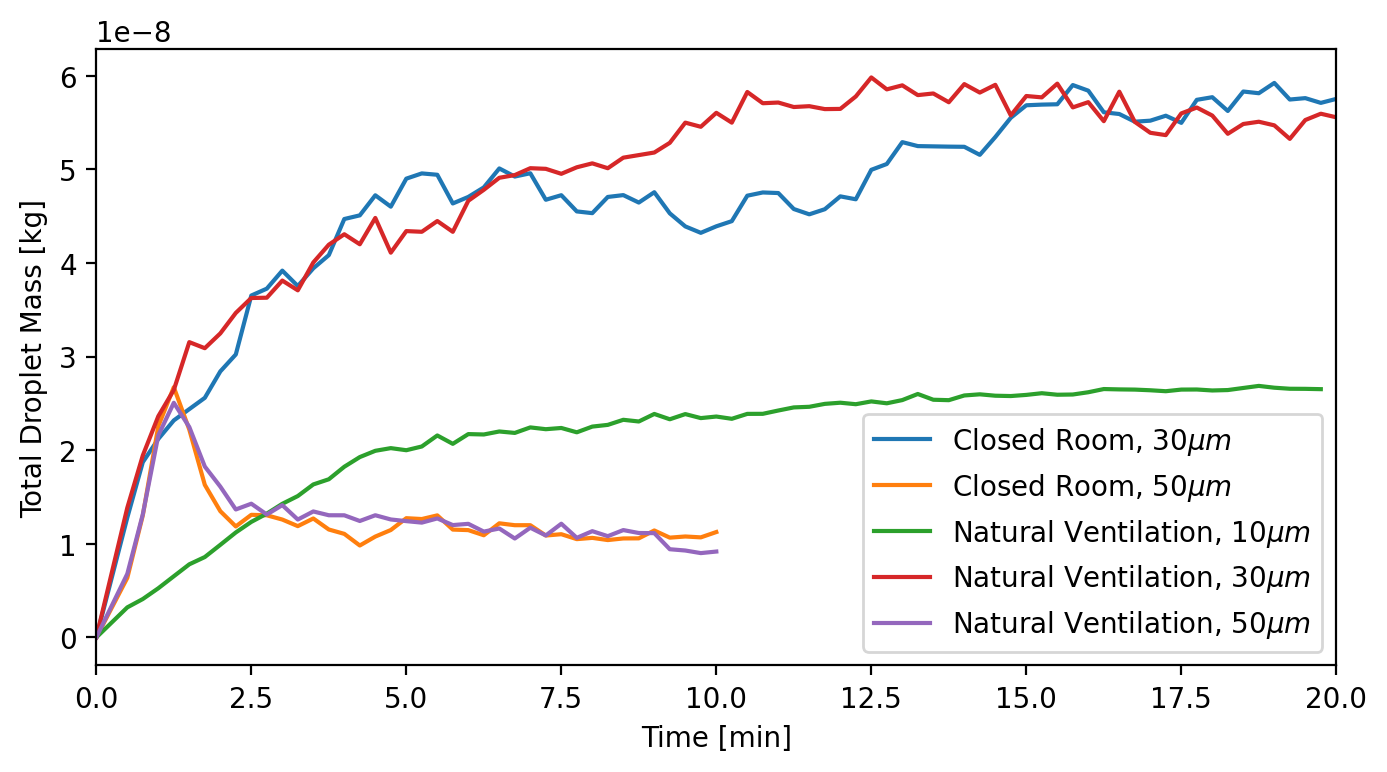

In [128]:
plt.figure(figsize=(8,4),dpi=200)
plt.plot(t_cr30/60,d_cr30,label='Closed Room, 30$\mu m$')
plt.plot(t_cr50/60,d_cr50,label='Closed Room, 50$\mu m$')
plt.plot(t_nv10/60,d_nv10,label='Natural Ventilation, 10$\mu m$')
plt.plot(t_nv30/60,d_nv30,label='Natural Ventilation, 30$\mu m$')
plt.plot(t_nv50/60,d_nv50,label='Natural Ventilation, 50$\mu m$')
plt.xlim([0,20])
plt.legend()
plt.xlabel('Time [min]')
plt.ylabel('Total Droplet Mass [kg]')

In [114]:
d_cr30 = np.array(pd.read_csv('../closedRoom_30um/delay_dpms.csv'))[:,0]
t_cr30 = np.array(pd.read_csv('../closedRoom_30um/delay_times.csv'))[:,0]
t_cr30 = t_cr30 - t_cr30[0]

d_cr50 = np.array(pd.read_csv('../closedRoom_50um/delay_dpms.csv'))[:,0]
t_cr50 = np.array(pd.read_csv('../closedRoom_50um/delay_times.csv'))[:,0]
t_cr50 = t_cr50 - t_cr50[0]

d_nv30 = np.array(pd.read_csv('../natural_30um/delay_dpms.csv'))[:,0]
t_nv30 = np.array(pd.read_csv('../natural_30um/delay_times.csv'))[:,0]
t_nv30 = t_nv30 - t_nv30[0]

Text(0, 0.5, 'Total Droplet Mass [kg]')

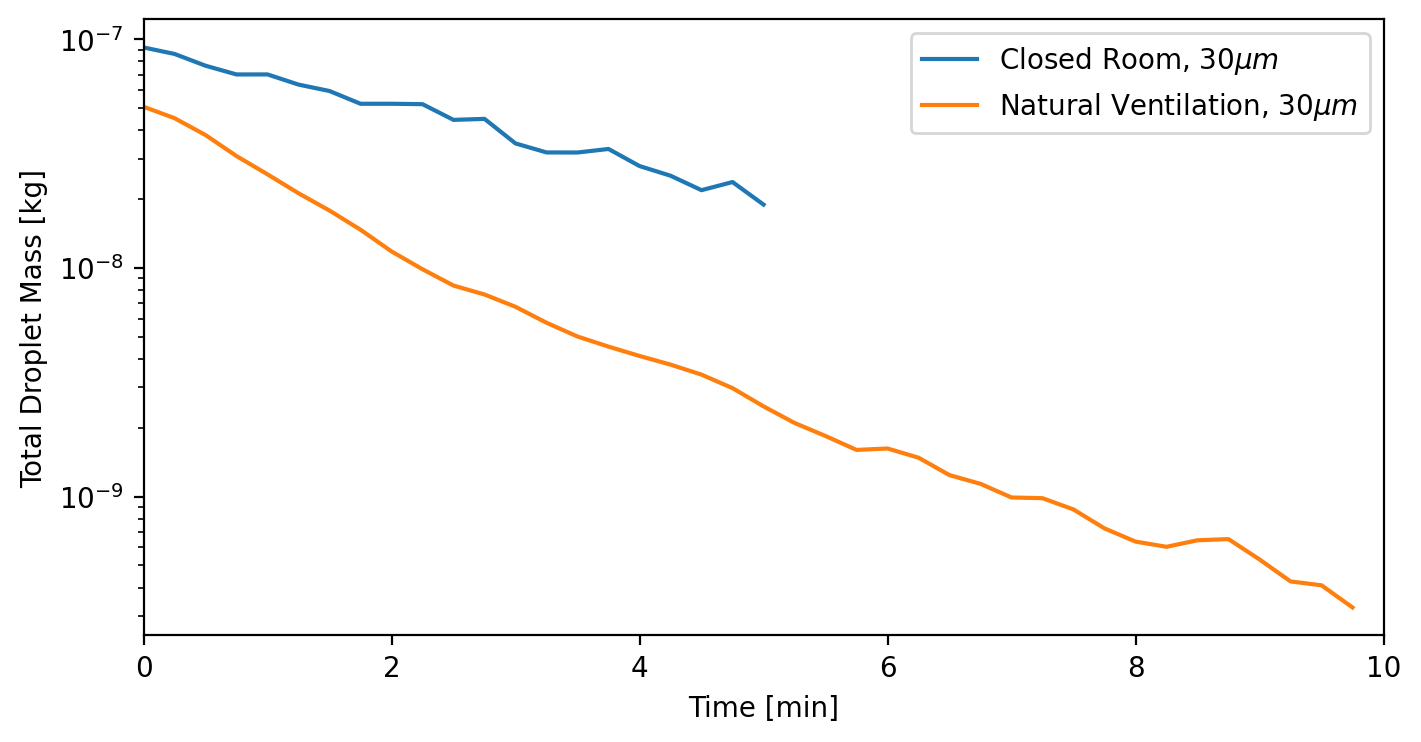

In [119]:
plt.figure(figsize=(8,4),dpi=200)
plt.semilogy(t_cr30/60,d_cr30,label='Closed Room, 30$\mu m$')
plt.semilogy(t_nv30/60,d_nv30,label='Natural Ventilation, 30$\mu m$')
plt.xlim([0,10])
plt.legend()
plt.xlabel('Time [min]')
plt.ylabel('Total Droplet Mass [kg]')